In [43]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [70]:
df = pd.read_csv("Cust_Segmentation.csv")
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
5,6,40,1,23,81,0.998,7.831,NaN,NBA016,10.9
6,7,38,2,4,56,0.442,0.454,0.0,NBA013,1.6
7,8,42,3,0,64,0.279,3.945,0.0,NBA009,6.6
8,9,26,1,5,18,0.575,2.215,NaN,NBA006,15.5
9,10,47,3,23,115,0.653,3.947,0.0,NBA011,4.0


In [72]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [63]:
df = pd.read_csv("Cust_Segmentation.csv")
pd.set_option('display.max_rows', None)
print(df)

     Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0              1   41    2               6      19      0.124       1.073   
1              2   47    1              26     100      4.582       8.218   
2              3   33    2              10      57      6.111       5.802   
3              4   29    2               4      19      0.681       0.516   
4              5   47    1              31     253      9.308       8.908   
5              6   40    1              23      81      0.998       7.831   
6              7   38    2               4      56      0.442       0.454   
7              8   42    3               0      64      0.279       3.945   
8              9   26    1               5      18      0.575       2.215   
9             10   47    3              23     115      0.653       3.947   
10            11   44    3               8      88      0.285       5.083   
11            12   34    2               9      40      0.374       0.266   

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [68]:
df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [46]:
# Here we are removing duplicates values 
df.drop_duplicates(inplace=True)

# We are removing missing values
df.dropna(inplace=True)

df = pd.read_csv("Cust_Segmentation.csv")
pd.set_option('display.max_rows', None)
print(df)

     Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0              1   41    2               6      19      0.124       1.073   
1              2   47    1              26     100      4.582       8.218   
2              3   33    2              10      57      6.111       5.802   
3              4   29    2               4      19      0.681       0.516   
4              5   47    1              31     253      9.308       8.908   
5              6   40    1              23      81      0.998       7.831   
6              7   38    2               4      56      0.442       0.454   
7              8   42    3               0      64      0.279       3.945   
8              9   26    1               5      18      0.575       2.215   
9             10   47    3              23     115      0.653       3.947   
10            11   44    3               8      88      0.285       5.083   
11            12   34    2               9      40      0.374       0.266   

In [73]:
scaler = StandardScaler()

# Extracting 
features = df[['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio']]

scaled_features = scaler.fit_transform(features)




df.to_csv("Cust_Segmentation_preprocessed.csv", index=False)

In [75]:
scaled_features

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.68381116,
        -0.59048916, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.41447366,
         1.51296181,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  2.13414111,
         0.80170393,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.5766659 ,
         0.03863257,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.68757659,
        -0.70147601, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.13611081,
         0.16463355, -0.2340332 ]])

In [76]:
X = df[['Age', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio']]
y = df['Defaulted']

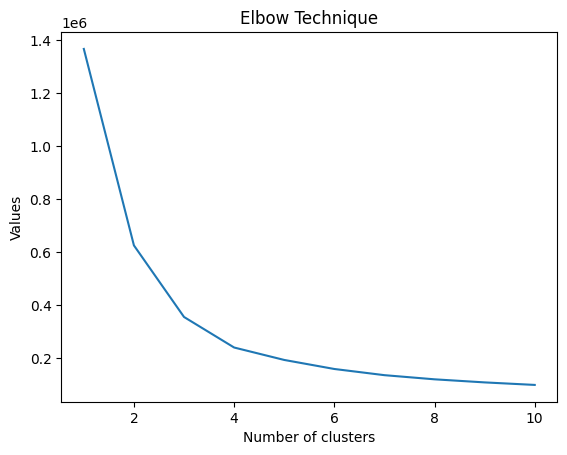

In [77]:
l = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    l.append(kmeans.inertia_)

# Elbow plot
plt.plot(range(1, 11), l)
plt.title('Elbow Technique')
plt.xlabel('Number of clusters')
plt.ylabel('Values')
plt.show()

In [78]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_prediction = kmeans.fit_predict(X)

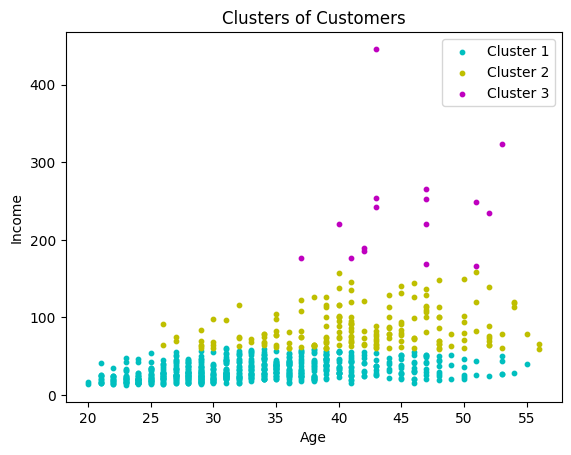

In [79]:
plt.scatter(X.iloc[y_prediction == 0, 0], X.iloc[y_prediction == 0, 1], s=10, c='c', label='Cluster 1')
plt.scatter(X.iloc[y_prediction == 1, 0], X.iloc[y_prediction == 1, 1], s=10, c='y', label='Cluster 2')
plt.scatter(X.iloc[y_prediction == 2, 0], X.iloc[y_prediction == 2, 1], s=10, c='m', label='Cluster 3')

plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()